In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

1. Implemente a regressão linear com múltiplas variáveis apresentada no slide 25 da aula 5. Para isso você pode utilizar os métodos np.dot e np.linalg.inv do pacote Numpy. A sua implementação deve funcionar para qualquer número de variáveis de entrada. 


In [3]:
def MyLinearRegression(dataframe: np.ndarray[np.ndarray[float]]):
    count_pontos = len(dataframe) # Pontos que devem ser melhor ajustados ao modelo
    count_features = len(dataframe[0]) - 1 # Último elemento é o y
    
    X = np.ones(shape=(count_pontos, count_features + 1))
    Y = np.zeros(shape=(count_pontos, 1), dtype=float)

    for i in range(count_pontos):
        pontos = dataframe[i]
        X[i][1:] = pontos[:count_features]
        Y[i] = pontos[count_features]

    result0 = np.dot(X.T, X)
    result0 = np.linalg.inv(result0)
    result1 = np.dot(X.T, Y)
    result = np.dot(result0, result1)
    return result

2. Implemente o RSS, RSE e SE dos coeficientes que foram definidos nos slides 51 e 53 da aula 5.

In [4]:
def MyLinearRegression(dataframe: np.ndarray[np.ndarray[float]]):
    count_pontos = len(dataframe) # Pontos que devem ser melhor ajustados ao modelo
    count_features = len(dataframe[0]) - 1 # Último elemento é o y
    
    X = np.ones(shape=(count_pontos, count_features + 1))
    Y = np.zeros(shape=(count_pontos, 1), dtype=float)

    for i in range(count_pontos):
        pontos = dataframe[i]
        X[i][1:] = pontos[:count_features]
        Y[i] = pontos[count_features]

    result0 = np.dot(X.T, X)
    result0 = np.linalg.inv(result0)
    result1 = np.dot(X.T, Y)
    result = np.dot(result0, result1)

    rss = 0
    for i in range(count_pontos):
        y_real = Y[i]
        #y_estimado = result[0] + result[1] * X[i][1]
        y_estimado = 0
        y_estimado += result[0]

        for j in range(1, count_features + 1):
            y_estimado += result[j] * X[i][j]

        rss += math.pow(y_real[0] - y_estimado[0], 2)
    
    rse = math.sqrt(rss / (count_pontos - 2))

    return [result, rss, rse]

3. Teste sua implementação nos exemplos apresentados nos slides 15 e 25 da aula 5. Devem ser apresentados: os coeficientes obtidos, RSS, RSE, intervalos de confiança para os coeficientes, e no caso de uma regressão linear simples (com somente 1 atributo de entrada), um gráfico com os pontos (atributo de entrada,atributo de saída) e a reta obtida pela regressão linear.

Coeficientes: 
[[-0.0889236]
 [ 1.9753966]]

Residual sum of squares: 
193.10387739177318

Residual Standard Error: 
4.91304230329555


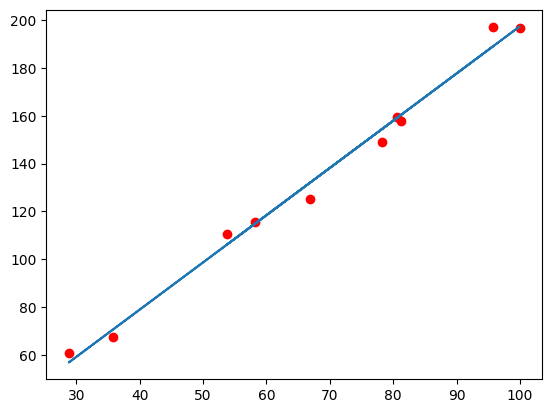

In [9]:
# Exemplo do Aula 5 - Slide 15
teste = np.array([
    [95.724162408, 197.179636092],
    [35.7576189281, 67.5906695414],
    [28.8168474238, 60.8541328206],
    [99.9584813087, 196.907396981],
    [66.8097483121, 125.311128524],
    [58.2156926413, 115.785784589],
    [53.8210763379, 110.762772705],
    [81.2960821704, 157.98528569],
    [80.6486970595, 159.61941373],
    [78.2528136925, 149.003865539],
])

X = []
y_real = []
for x, y in teste:
    X.append(x)
    y_real.append(y)

result, rss, rse = MyLinearRegression(teste)

print("Coeficientes: ")
print(result)

print("\nResidual sum of squares: ")
print(rss)

print("\nResidual Standard Error: ")
print(rse)

y_previsto = []
for x, y in teste:
    y_til = result[0] + result[1] * x
    y_previsto.append(y_til[0])
plt.plot(X, y_real, 'ro', X, y_previsto)
plt.show()

In [6]:
# Exemplo do Aula 5 - Slide 25
teste = np.array([
    [1.4, 0.9, 0.7],
    [2.6, 1.8, 1.3],
    [3.7, 3.5, 2.0],
    [5.5, 3.9, 3.6],
    [4.9, 5.6, 3.9],
])

result, rss, rse = MyLinearRegression(teste)

print("Coeficientes: ")
print(result)

print("\nResidual sum of squares: ")
print(rss)

print("\nResidual Standard Error: ")
print(rse)

Coeficientes: 
[[-0.50874313]
 [ 0.51060702]
 [ 0.30584258]]

Residual sum of squares: 
0.305205759813808

Residual Standard Error: 
0.31895964207289507


4. Compare os coeficientes obtidos pela sua implementação com o resultado gerado pelo método LinearRegression so scikit (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 


In [7]:
from sklearn.linear_model import LinearRegression

In [16]:
teste = np.array([
    [95.724162408, 197.179636092],
    [35.7576189281, 67.5906695414],
    [28.8168474238, 60.8541328206],
    [99.9584813087, 196.907396981],
    [66.8097483121, 125.311128524],
    [58.2156926413, 115.785784589],
    [53.8210763379, 110.762772705],
    [81.2960821704, 157.98528569],
    [80.6486970595, 159.61941373],
    [78.2528136925, 149.003865539],
])

X = []
y_real = []
for x, y in teste:
    X.append([x])
    y_real.append([y])

reg = LinearRegression().fit(X, y_real)

print("Coeficientes: ")
print(reg.intercept_, reg.coef_)

Coeficientes: 
[-0.0889236] [[1.9753966]]


Resultados foram iguais

5. Utilize a sua implementação e a do scikit no dataset exercicio1.csv. O que ocorreu? Por que?